<a href="https://colab.research.google.com/github/TenoEngineer/Prevendo-o-clima-no-dia-do-meu-casamento/blob/main/PREVENDO_TEMPERATURA_NO_DIA_DO_CASAMENTO_EM_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREVENDO TEMPERATURA NO DIA DO CASAMENTO EM MS**

Aqui será realizada um simples desenvolvimento de análise de dados para prever a temperatura do dia 10/10/2021 (dia do meu casamento) através dos dados disponíveis no site https://previsao.inmet.gov.br. Selecionei os últimos 9 anos para gerar uma análise preditiva.

Manipularei os dados para obter somente os de Outubro. Realizarei médias, desvio padrão... somente o dia 10 e depois com a semana, gerando gráficos e predições.

Sabe-se que o clima é algo extremamente instável. Mas através dos dados creio que seja possível gerar uma conclusão baseado nos dados.

# Importação dos dados

In [ ]:
import pandas as pd
clima = pd.read_csv('/content/drive/MyDrive/dados_A750_H_2012-01-01_2020-12-31.csv', sep=';')
clima.head()

,Data Medicao,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
0,01/01/2012,0,0.0,22.4,95.0,0.0
1,01/01/2012,100,0.0,21.7,96.0,0.0
2,01/01/2012,200,0.0,21.2,96.0,0.0
3,01/01/2012,300,0.0,21.0,96.0,0.0
4,01/01/2012,400,0.0,20.2,96.0,0.0


#Separação dos dados de Outubro

In [ ]:
clima_outubro = clima[clima['Data Medicao'].str.contains('/10/')]
clima_outubro.head()

,Data Medicao,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
6576,01/10/2012,0,0.0,25.8,54.0,1.6
6577,01/10/2012,100,0.0,23.9,63.0,3.4
6578,01/10/2012,200,0.0,22.6,67.0,3.5
6579,01/10/2012,300,0.0,21.7,70.0,3.4
6580,01/10/2012,400,0.0,20.8,73.0,2.6


Data Frame com apenas os meses de outubro dos anos de 2012 a 2020.

#Dados com o dia 10/10 dos anos de 2012 até 2020

In [ ]:
clima_outubro_dia = clima_outubro[clima_outubro['Data Medicao'].str.contains('10/10')]
clima_outubro[clima_outubro['Data Medicao'].str.contains('10/10')].describe()

,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
count,216.000000,192.000000,209.000000,209.000000,209.000000
mean,1150.000000,0.166667,23.414354,61.430622,2.173206
std,693.826599,0.756773,5.747389,27.219659,1.636204
min,0.000000,0.000000,14.300000,10.000000,0.000000
25%,575.000000,0.000000,19.600000,35.000000,0.900000
50%,1150.000000,0.000000,21.600000,67.000000,1.900000
75%,1725.000000,0.000000,26.500000,87.000000,3.400000
max,2300.000000,7.400000,36.900000,98.000000,5.900000


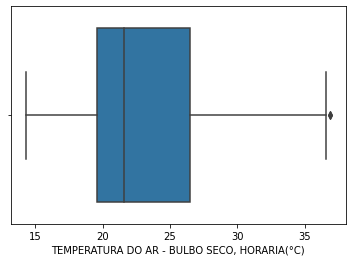

In [ ]:
import seaborn as sns
sns.boxplot(x=clima_outubro_dia['TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'])

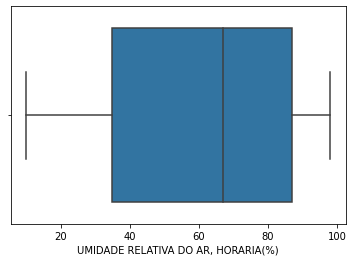

In [ ]:
sns.boxplot(x=clima_outubro_dia['UMIDADE RELATIVA DO AR, HORARIA(%)'])

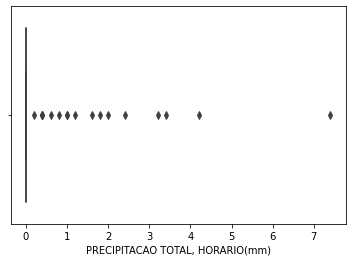

In [ ]:
sns.boxplot(x=clima_outubro_dia['PRECIPITACAO TOTAL, HORARIO(mm)'])


Há vários outliners, há porcentagem de algo maior que zero é menor que 25%

#Agrupamento dos dados do dia 05/10 até o dia 10/10 dos anos de 2012 até 2020

Inicialmente propus desenvolver manualmente todas as datas.

In [ ]:
#PODERIA FAZER UM LOOP AQUI, MAS FIQUEI SEM IDEIA
clima_outubro_dia5 = clima_outubro[clima_outubro['Data Medicao'].str.contains('05/10')]
clima_outubro_dia6 = clima_outubro[clima_outubro['Data Medicao'].str.contains('06/10')]
clima_outubro_dia7 = clima_outubro[clima_outubro['Data Medicao'].str.contains('07/10')]
clima_outubro_dia8 = clima_outubro[clima_outubro['Data Medicao'].str.contains('08/10')]
clima_outubro_dia9 = clima_outubro[clima_outubro['Data Medicao'].str.contains('09/10')]
clima_outubro_dia10 = clima_outubro[clima_outubro['Data Medicao'].str.contains('10/10')]
clima_outubro_dia11 = clima_outubro[clima_outubro['Data Medicao'].str.contains('11/10')]
clima_outubro_dia12 = clima_outubro[clima_outubro['Data Medicao'].str.contains('12/10')]
clima_outubro_dia13 = clima_outubro[clima_outubro['Data Medicao'].str.contains('13/10')]
clima_outubro_dia14 = clima_outubro[clima_outubro['Data Medicao'].str.contains('14/10')]
clima_outubro_dia15 = clima_outubro[clima_outubro['Data Medicao'].str.contains('15/10')]
clima_outubro_dias = clima_outubro_dia5.append([clima_outubro_dia6,clima_outubro_dia7,clima_outubro_dia8,clima_outubro_dia9,clima_outubro_dia10,
                      clima_outubro_dia11,clima_outubro_dia12,clima_outubro_dia13,clima_outubro_dia14,clima_outubro_dia15])

Desenvolvi um loop para o agrupamento dos dados

In [ ]:
#FIZ DOIS LOOPS - AINDA DA PRA ENXUGAR ISSO AI
x = 5
dias = clima_outubro[clima_outubro['Data Medicao'].str.contains('05/10')]
while x < 10 :
  dx = clima_outubro[clima_outubro['Data Medicao'].str.contains('0%i/10' %x)]
  dias = dias.append(dx)
  x = x + 1
i = 10
while i < 16 :
  di = clima_outubro[clima_outubro['Data Medicao'].str.contains('%i/10' %i)]
  dias = dias.append(di)
  i = i + 1

##Análise com o agrupamento dos dados

Médias de todas as informações se agrupando pelas datas

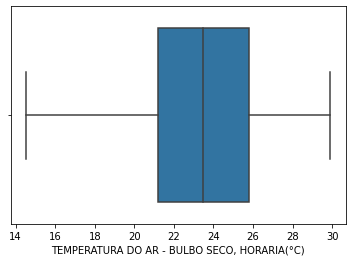

In [ ]:
medias = dias.groupby(['Data Medicao']).mean()
medias.reset_index(inplace=True)
sns.boxplot(x=medias['TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'])


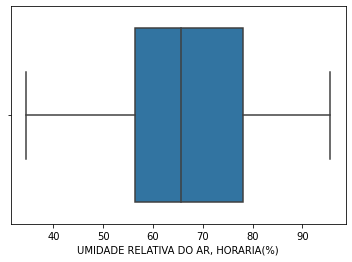

In [ ]:
sns.boxplot(x=medias['UMIDADE RELATIVA DO AR, HORARIA(%)'])

Um dos problemas dessa média é que pega os horários noturnos, também. O certo seria retirar os horários noturno que não seriam relevantes para mim.

In [ ]:
dias.describe()

,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
count,2592.000000,2286.000000,2548.000000,2546.000000,2548.000000
mean,1150.000000,0.147682,23.412991,66.145326,2.177433
std,692.352224,1.148688,5.828308,22.872520,1.763675
min,0.000000,0.000000,9.200000,10.000000,0.000000
25%,575.000000,0.000000,19.375000,48.250000,0.700000
50%,1150.000000,0.000000,22.200000,71.000000,1.900000
75%,1725.000000,0.000000,27.125000,86.000000,3.300000
max,2300.000000,36.400000,40.200000,99.000000,10.200000


Seleção dos dados que estão entre às 6h e 19h e gerando a média dos dias.

In [ ]:
dias_dia = dias[(dias['Hora Medicao'] > 600) & (dias['Hora Medicao'] < 1900)]
dias_dia.groupby('Data Medicao').mean()

,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,,
05/10/2012,1250,0.000000,24.516667,72.000000,1.950000
05/10/2013,1250,0.000000,19.811111,49.222222,2.955556
05/10/2014,1250,0.000000,20.508333,56.416667,6.283333
05/10/2015,1250,0.166667,25.041667,69.272727,1.683333
05/10/2016,1250,0.516667,19.975000,83.333333,1.108333
...,...,...,...,...,...
15/10/2016,1250,0.000000,25.508333,68.500000,2.958333
15/10/2017,1250,0.000000,21.091667,63.500000,0.983333
15/10/2018,1250,NaN,23.675000,70.416667,1.383333


In [ ]:
dias_dia.describe()

,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
count,1296.000000,1134.000000,1264.000000,1262.000000,1264.000000
mean,1250.000000,0.141446,23.896915,64.876387,2.481646
std,345.338511,0.849460,6.380473,24.136223,1.928692
min,700.000000,0.000000,9.200000,10.000000,0.000000
25%,975.000000,0.000000,19.175000,45.000000,0.800000
50%,1250.000000,0.000000,22.400000,70.000000,2.300000
75%,1525.000000,0.000000,28.600000,86.000000,3.800000
max,1800.000000,14.400000,40.200000,99.000000,10.200000


Com o *describe* eu consigo ver que em todos esses 9 anos a probabilidade de chover nesses 10 dias é menor que 25%, sendo que 75% dos dados da precipitação está em 0. 
Entretanto, há um dia pelo menos que choveu razoavelmente bastante (14mm). Assim, seria interessante ver quantos dias ocorreu chuva.

In [ ]:
chuva = sum(dias_dia['PRECIPITACAO TOTAL, HORARIO(mm)']>0)
sem_chuva = sum(dias_dia['PRECIPITACAO TOTAL, HORARIO(mm)']<90)
prob = chuva/sem_chuva
prob*100

7.054673721340388

In [ ]:
#A PROBABILIDADE DE CHOVER DURANTE O DIA DO DIA 5 ATÉ O DIA 15 É DE 7%

In [ ]:
dias_dia[dias_dia['PRECIPITACAO TOTAL, HORARIO(mm)']>0].groupby('Data Medicao').mean().info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 05/10/2015 to 15/10/2020
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Hora Medicao                                 23 non-null     float64
 1   PRECIPITACAO TOTAL, HORARIO(mm)              23 non-null     float64
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)  23 non-null     float64
 3   UMIDADE RELATIVA DO AR, HORARIA(%)           23 non-null     float64
 4   VENTO, VELOCIDADE HORARIA(m/s)               23 non-null     float64
dtypes: float64(5)
memory usage: 1.1+ KB


In [ ]:
dias_dia.groupby('Data Medicao').mean().info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 05/10/2012 to 15/10/2020
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Hora Medicao                                 99 non-null     int64  
 1   PRECIPITACAO TOTAL, HORARIO(mm)              88 non-null     float64
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)  99 non-null     float64
 3   UMIDADE RELATIVA DO AR, HORARIA(%)           99 non-null     float64
 4   VENTO, VELOCIDADE HORARIA(m/s)               99 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 4.6+ KB


In [ ]:
#dos 99 dias, 23 dias ocorreu alguma precipitação
prob_chuva=23/99
prob_chuva*100

23.232323232323232

In [ ]:
dias_dia2 = dias_dia.dropna()
dias_dia2.groupby('Data Medicao').mean()

,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,,
05/10/2012,1250.000000,0.000000,24.516667,72.000000,1.950000
05/10/2013,1366.666667,0.000000,19.811111,49.222222,2.955556
05/10/2014,1250.000000,0.000000,20.508333,56.416667,6.283333
05/10/2015,1245.454545,0.163636,24.681818,69.272727,1.590909
05/10/2016,1250.000000,0.516667,19.975000,83.333333,1.108333
...,...,...,...,...,...
15/10/2015,1250.000000,0.000000,30.208333,51.166667,4.758333
15/10/2016,1250.000000,0.000000,25.508333,68.500000,2.958333
15/10/2017,1250.000000,0.000000,21.091667,63.500000,0.983333


Quantidade de horas registradas com precipitação maior que 0

In [ ]:
dias_dia2[dias_dia2['PRECIPITACAO TOTAL, HORARIO(mm)']>0].groupby('Data Medicao').count()

,Hora Medicao,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,,
05/10/2015,2,2,2,2,2
05/10/2016,4,4,4,4,4
05/10/2019,4,4,4,4,4
06/10/2019,6,6,6,6,6
07/10/2014,1,1,1,1,1
07/10/2016,1,1,1,1,1
07/10/2017,1,1,1,1,1
07/10/2019,1,1,1,1,1
08/10/2017,3,3,3,3,3


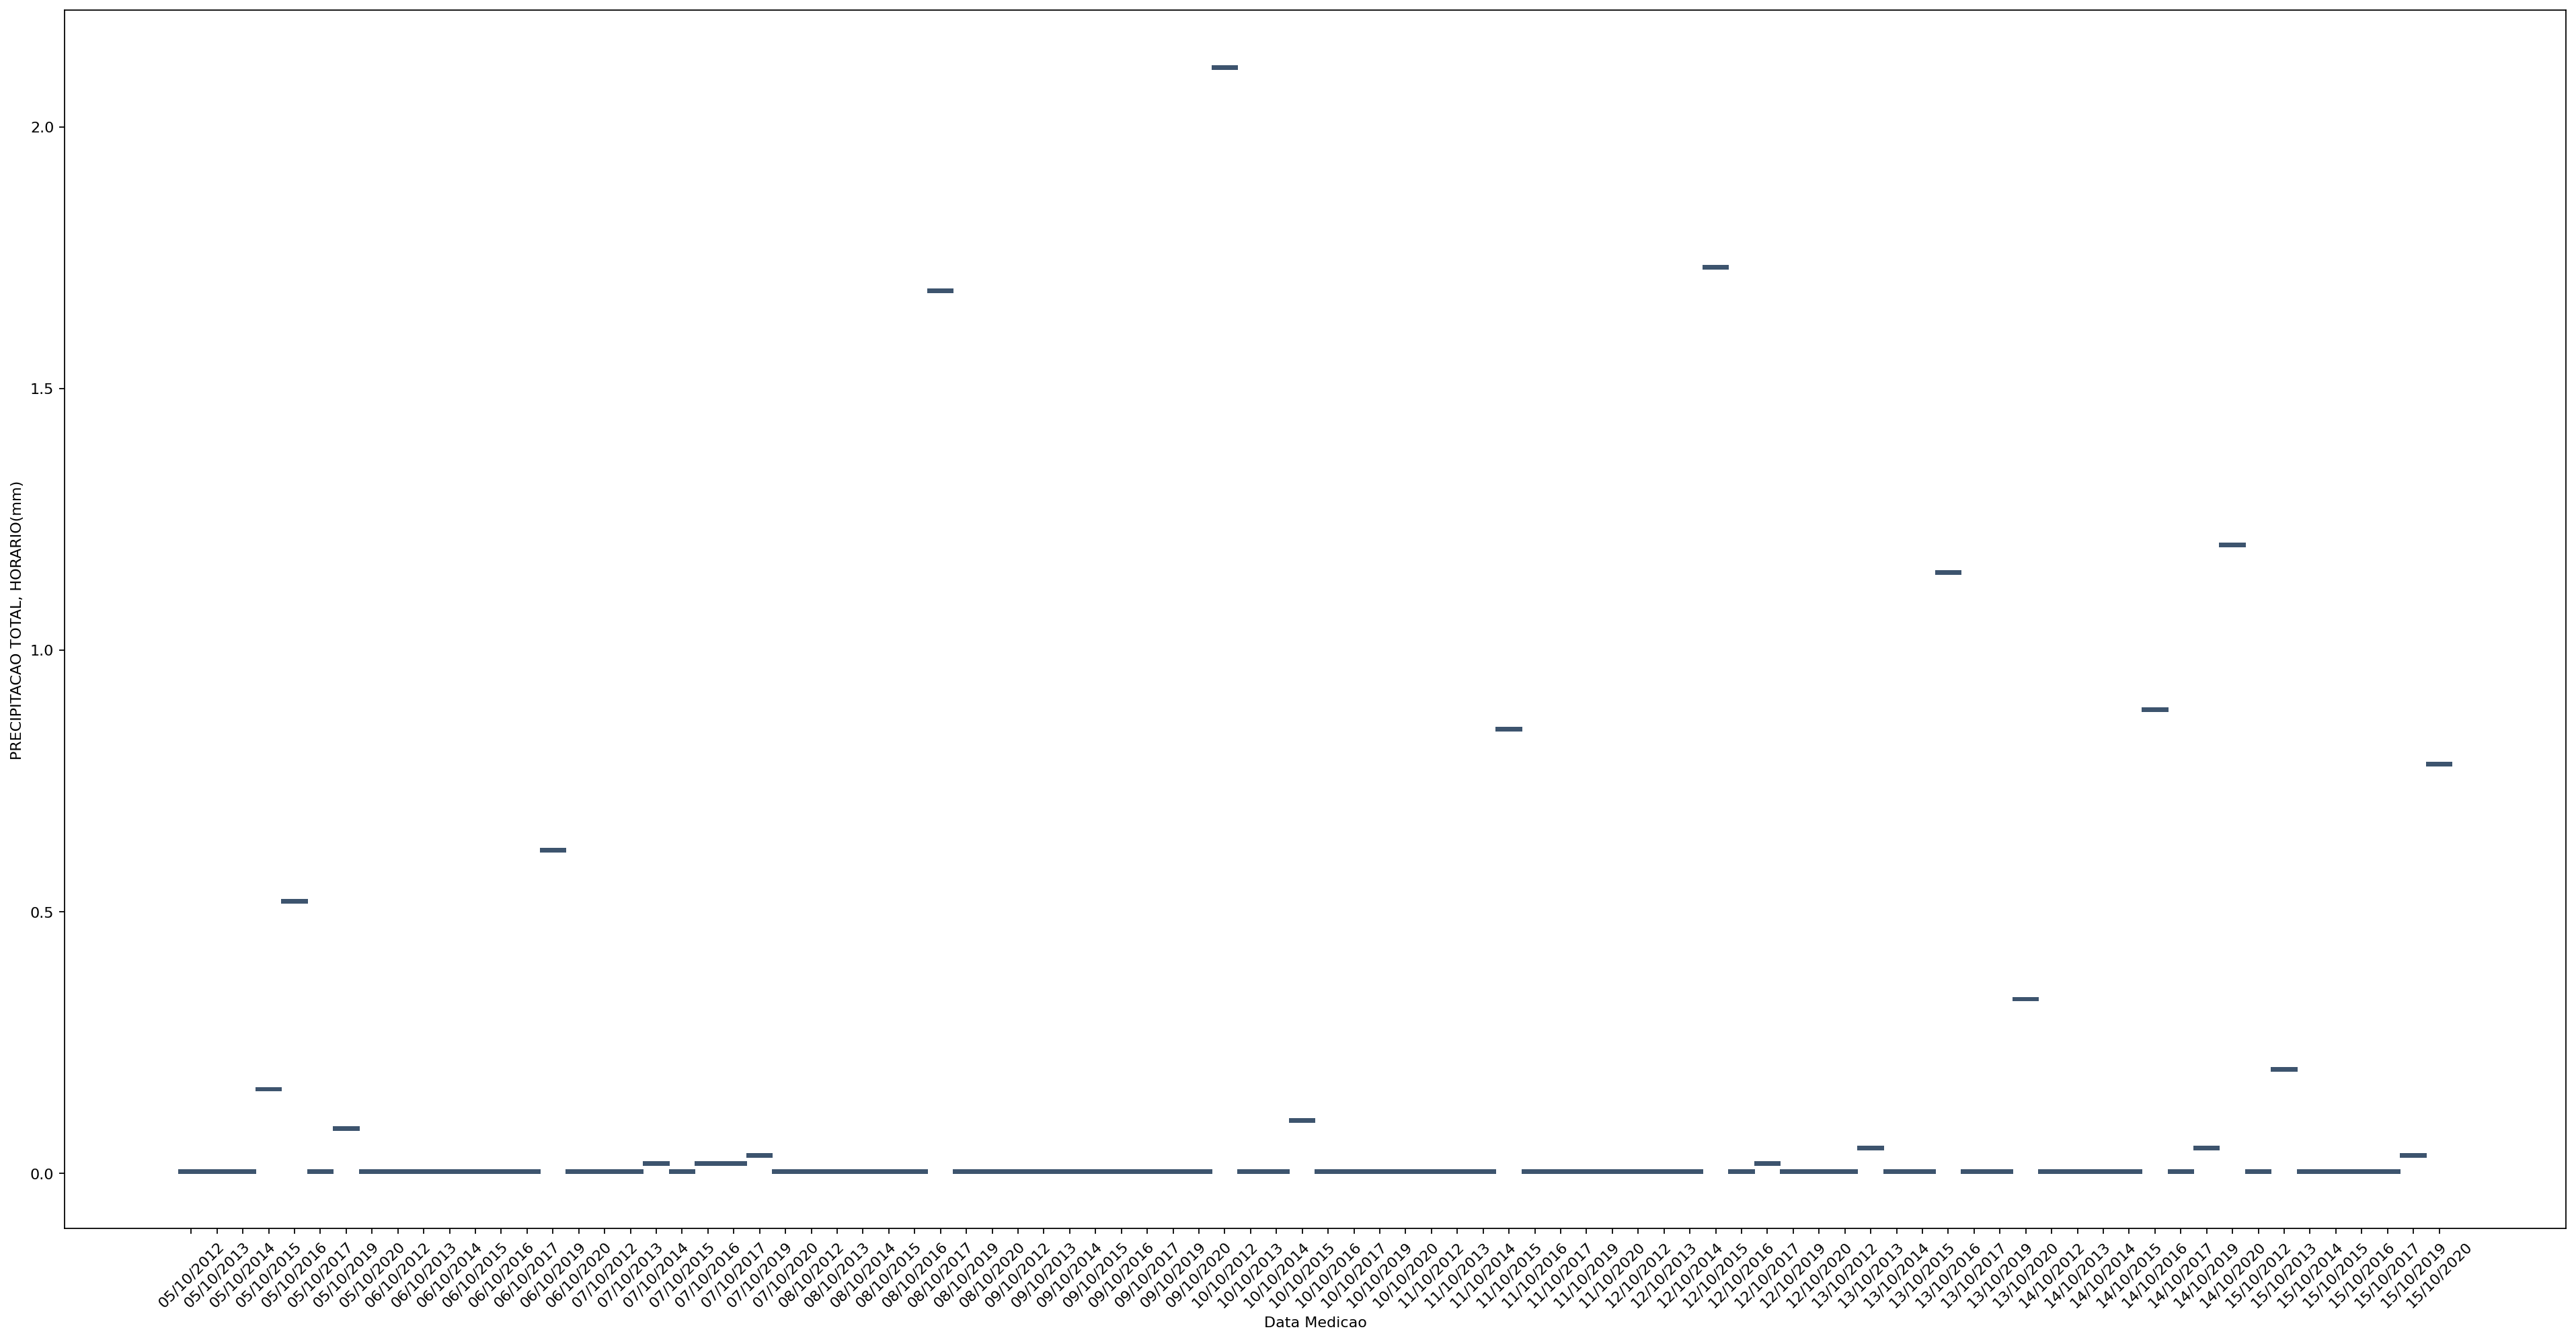

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30, 15), dpi= 160, facecolor='w', edgecolor='k')
plt.xticks(rotation = 45)
sns.histplot(data=dias_dia2.groupby('Data Medicao').mean(), x='Data Medicao', y='PRECIPITACAO TOTAL, HORARIO(mm)')